In [1]:
#Kaggle account setup
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"edgemcsow","key":"c6c766b5ae0fb183ee56ce91a4d03d87"}'}

In [2]:
#Install Kaggle API client.
!pip install -q kaggle

In [3]:
#Move Kaggle file to ~/.kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Grant permission.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Create and Select a directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# Download dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

100% 609M/612M [00:04<00:00, 137MB/s]
100% 612M/612M [00:04<00:00, 146MB/s]
/content


In [6]:
#Unzip file and removing unnecessary files
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [7]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

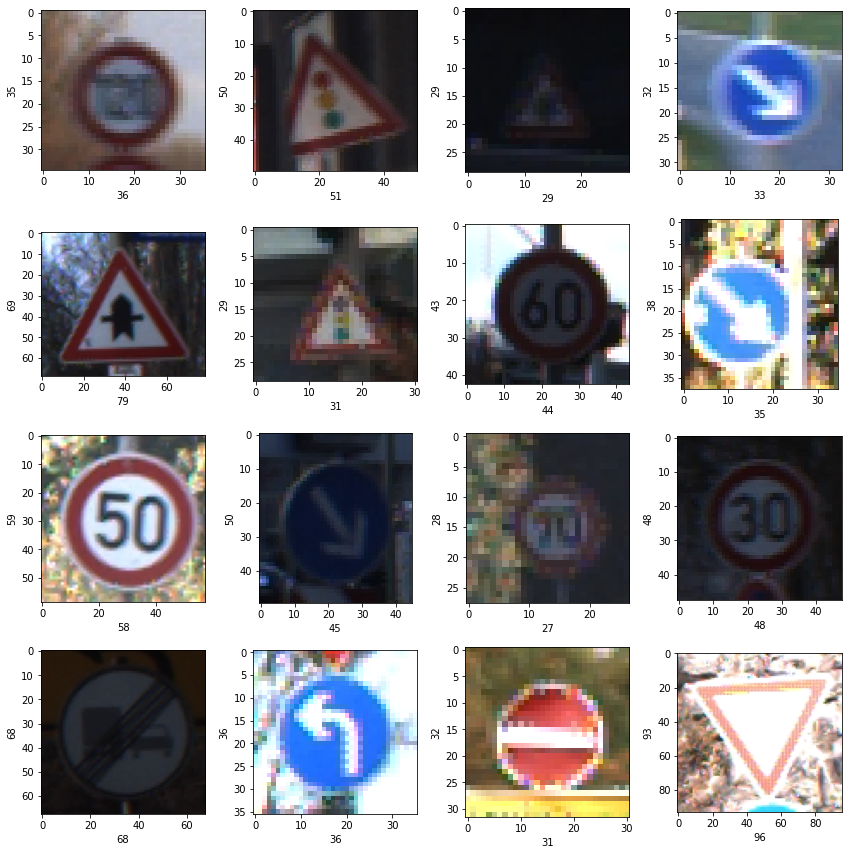

In [8]:
#Visualize Dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [9]:
#Standardize the image dimensions (use mean of dimensions)
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [10]:
#Show mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [11]:
#Reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [12]:
#Converting images into numpy array
images = np.array(images)

#Normalize the Images.
images = images/255 

In [13]:
#Explore the shape of the labels
label_id = np.array(label_id)
label_id.shape

(39209,)

In [14]:
#Explore the shape of the images
images.shape

(39209, 50, 50, 3)

In [15]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [16]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [17]:
#One-hot encoding using keras built-in function.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [18]:
#Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [20]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 201s - loss: 2.5461 - accuracy: 0.3058 - val_loss: 1.2177 - val_accuracy: 0.7036 - 201s/epoch - 816ms/step
Epoch 2/10
246/246 - 198s - loss: 1.2031 - accuracy: 0.6267 - val_loss: 0.5476 - val_accuracy: 0.8916 - 198s/epoch - 805ms/step
Epoch 3/10
246/246 - 196s - loss: 0.8143 - accuracy: 0.7408 - val_loss: 0.3075 - val_accuracy: 0.9239 - 196s/epoch - 796ms/step
Epoch 4/10
246/246 - 196s - loss: 0.6477 - accuracy: 0.7929 - val_loss: 0.2145 - val_accuracy: 0.9574 - 196s/epoch - 796ms/step
Epoch 5/10
246/246 - 195s - loss: 0.5596 - accuracy: 0.8186 - val_loss: 0.1631 - val_accuracy: 0.9666 - 195s/epoch - 795ms/step
Epoch 6/10
246/246 - 195s - loss: 0.4861 - accuracy: 0.8397 - val_loss: 0.1381 - val_accuracy: 0.9750 - 195s/epoch - 793ms/step
Epoch 7/10
246/246 - 194s - loss: 0.4685 - accuracy: 0.8480 - val_loss: 0.1211 - val_accuracy: 0.9762 - 194s/epoch - 789ms/step
Epoch 8/10
246/246 - 194s - loss: 0.4132 - accuracy: 0.8635 - val_loss: 0.1009 - val_accuracy: 0.9836 - 

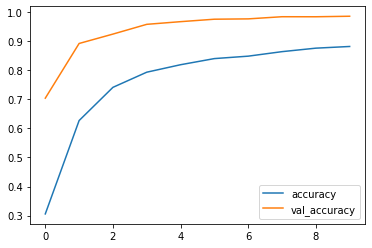

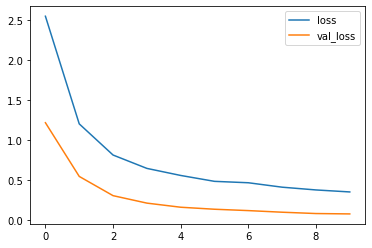

In [21]:
#Plot the Evaluation Graphs
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [22]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [23]:
#Setup a function to scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    
    #Normalize the Images.
    images = images/255

    return images

In [24]:
#Apply the function on Test Images
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [25]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [27]:
y_pred = model.predict(test_images);
y_pred

array([[2.7240320e-17, 5.8323999e-15, 1.4955235e-11, ..., 2.6310931e-17,
        3.6546524e-10, 2.9648907e-12],
       [3.8124708e-05, 9.9961036e-01, 9.8694174e-05, ..., 2.0082975e-16,
        2.1446950e-20, 9.6283527e-16],
       [0.0000000e+00, 4.0589298e-33, 1.7088860e-25, ..., 8.7191920e-24,
        1.9532921e-25, 1.2869775e-30],
       ...,
       [1.3940282e-04, 1.2774644e-03, 3.3193320e-02, ..., 3.6547810e-04,
        3.1108342e-04, 6.2931678e-04],
       [6.6299958e-06, 5.7381090e-05, 5.6370522e-04, ..., 6.5791096e-06,
        1.9797673e-08, 1.8034843e-04],
       [3.5618851e-07, 3.2927055e-06, 5.5543376e-05, ..., 1.4378558e-07,
        2.1626258e-08, 2.9609151e-05]], dtype=float32)

In [28]:
#Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

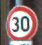

In [29]:
#Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [30]:
#Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])